In [1]:
# %load np_load_allow_pickle_True.py
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# np.load 사용 후 반드시 아래 코드를 실행할 것!!!
# np.load = np_load_old

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
np.load = np_load_old

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0718 15:38:50.274462 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 15:38:50.290461 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 15:38:50.294463 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0718 15:38:50.339148 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 15:38:50.363152 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1512,
                    validation_data=(x_val, y_val))

W0718 15:38:50.463184 11156 deprecation.py:323] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 15:38:50.515154 11156 deprecation_wrapper.py:119] From C:\Users\ysj14\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 143us/step - loss: 3.6888 - acc: 0.3423 - val_loss: 3.3782 - val_acc: 0.4350
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 3.1431 - acc: 0.4637 - val_loss: 2.7528 - val_acc: 0.5270
Epoch 3/20
7982/7982 [==============================] - 1s 104us/step - loss: 2.5149 - acc: 0.5373 - val_loss: 2.2251 - val_acc: 0.5370
Epoch 4/20
7982/7982 [==============================] - 1s 103us/step - loss: 2.0030 - acc: 0.5630 - val_loss: 1.8406 - val_acc: 0.5920
Epoch 5/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.6562 - acc: 0.6492 - val_loss: 1.6076 - val_acc: 0.6440
Epoch 6/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.4264 - acc: 0.7023 - val_loss: 1.4538 - val_acc: 0.6870
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.2564 - acc: 0.7316 - val_loss: 1.3454 - val_acc: 0.7110


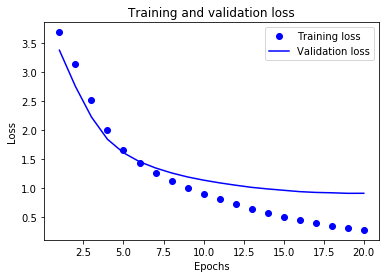

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

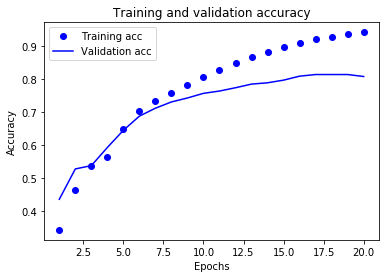

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=1512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 134us/step - loss: 3.6613 - acc: 0.2281 - val_loss: 3.3422 - val_acc: 0.4800
Epoch 2/9
7982/7982 [==============================] - 1s 103us/step - loss: 3.1161 - acc: 0.4727 - val_loss: 2.8197 - val_acc: 0.5080
Epoch 3/9
7982/7982 [==============================] - 1s 104us/step - loss: 2.5543 - acc: 0.5492 - val_loss: 2.3176 - val_acc: 0.5750
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 2.0400 - acc: 0.6204 - val_loss: 1.8752 - val_acc: 0.6200
Epoch 5/9
7982/7982 [==============================] - 1s 103us/step - loss: 1.6382 - acc: 0.6751 - val_loss: 1.5912 - val_acc: 0.6600
Epoch 6/9
7982/7982 [==============================] - 1s 102us/step - loss: 1.3789 - acc: 0.7164 - val_loss: 1.4117 - val_acc: 0.6870
Epoch 7/9
7982/7982 [==============================] - 1s 102us/step - loss: 1.1935 - acc: 0.7420 - val_loss: 1.2886 - val_acc: 0.7120
Epoch 8

In [13]:
results

[1.204431263336834, 0.7341941228851291]

In [14]:
predictions = model.predict(x_test)
print(predictions[0].max())
print(np.argmax(predictions[0]))

0.87915367
3
